**Задание 1 - Логистическая регрессия**

В этом задании вы будете использовать набор данных "Breast Cancer Wisconsin (Diagnostic)" (from sklearn.datasets import load_breast_cancer)для предсказания типа опухоли (злокачественная или доброкачественная) с помощью модели логистической регрессии. Вам необходимо выполнить следующие шаги:



Загрузите датасет и разделите его на обучающую и тестовую выборки.



Обучите модель логистической регрессии на обучающей выборке.



Оцените точность вашей модели на тестовой выборке.



Проанализируйте влияние признаков на решение модели, взглянув на коэффициенты модели.



Визуализируйте распределение данных по первым двум признакам для лучшего понимания структуры данных.

In [1]:
import pandas as pd

from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

data = datasets.load_breast_cancer()

X = pd.DataFrame(data=data.data, columns=data.feature_names) 
y = pd.Series(data=data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model = LogReg(max_iter=100000)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)

print(f"Accuracy (log_loss):{accuracy}")

Accuracy (log_loss):0.935672514619883


In [185]:
model.predict_proba(X_test)

array([[1.02351931e-04, 9.99897648e-01],
       [1.79445424e-01, 8.20554576e-01],
       [9.99885064e-01, 1.14935516e-04],
       [1.00000000e+00, 4.27554641e-10],
       [1.00000000e+00, 6.98519495e-18],
       [9.43034835e-05, 9.99905697e-01],
       [5.74494474e-04, 9.99425506e-01],
       [9.34392604e-04, 9.99065607e-01],
       [7.21347854e-05, 9.99927865e-01],
       [1.83780327e-01, 8.16219673e-01],
       [4.61542989e-05, 9.99953846e-01],
       [4.07009898e-06, 9.99995930e-01],
       [3.72545789e-03, 9.96274542e-01],
       [2.59122880e-04, 9.99740877e-01],
       [6.66149661e-04, 9.99333850e-01],
       [1.20688134e-01, 8.79311866e-01],
       [4.04159330e-03, 9.95958407e-01],
       [5.14626698e-04, 9.99485373e-01],
       [1.34870690e-05, 9.99986513e-01],
       [5.34146403e-04, 9.99465854e-01],
       [1.19002965e-04, 9.99880997e-01],
       [9.99895792e-01, 1.04208305e-04],
       [3.11271197e-03, 9.96887288e-01],
       [9.99995886e-01, 4.11389344e-06],
       [2.524269

In [186]:
model.coef_, model.intercept_

(array([[ 0.98794857,  0.25984315, -0.21798385,  0.02673593, -0.16405082,
         -0.23104558, -0.4086625 , -0.22478664, -0.18940389, -0.04065832,
         -0.03804194,  0.81796829, -0.2052488 , -0.10239525, -0.01344129,
          0.08163517,  0.03693153, -0.01501845, -0.02696763,  0.01504156,
          0.20439447, -0.41745069, -0.12578972, -0.01947634, -0.31400263,
         -0.64769736, -1.01551112, -0.41581   , -0.61004906, -0.09529572]]),
 array([25.26492931]))

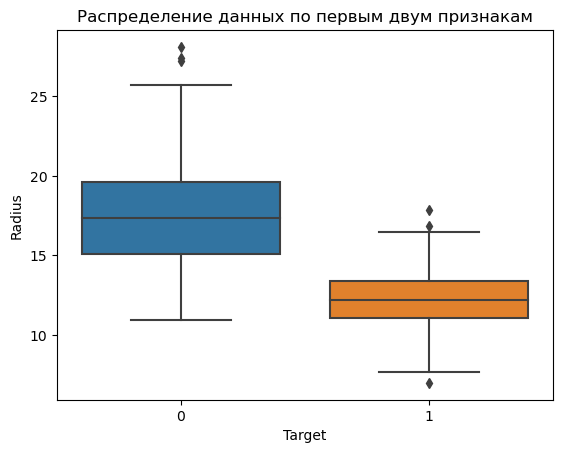

In [200]:
df = pd.concat([X, y.rename('target')],axis=1)

sns.boxplot(data=df, x='target', y='mean radius')
plt.title('Распределение данных по первым двум признакам')
plt.xlabel('Target')
plt.ylabel('Radius')
plt.show()

**Ответ**
Чем больше опухоль, тем оно злокачественнее.

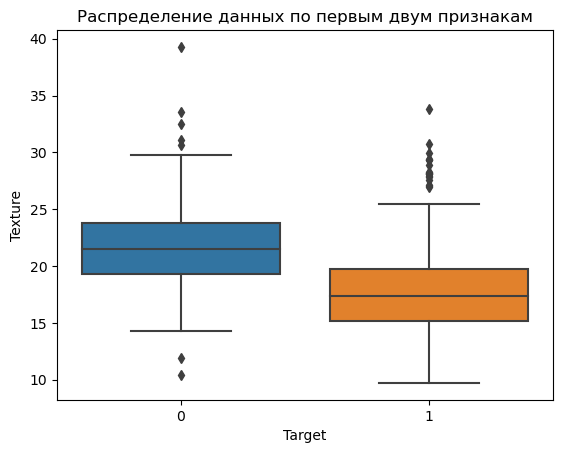

In [201]:
sns.boxplot(data=df, x='target', y='mean texture')
plt.title('Распределение данных по первым двум признакам')
plt.xlabel('Target')
plt.ylabel('Texture')
plt.show()

**Ответ**
Текстура в некоторой степени влияет.Опухоль чаще доброкачественна, если среднее значение текстуры опухоли ниже.   

**Задание 2 - Логистическая регрессия с статистической значимостью**

Используя датасет "Breast Cancer Wisconsin (Diagnostic)", проанализировать значимость признаков для предсказания типа опухоли (злокачественной или доброкачественной) с помощью модели логистической регрессии и статистических тестов. Шаги выполнения:



Подготовка данных: Разделите датасет на обучающую и тестовую выборки.



Обучение модели и оценка значимости признаков:

Используйте статистическую модель OLS из библиотеки statsmodels для обучения модели на обучающей выборке.

Выведите сводку модели с помощью метода .summary() и проанализируйте p-значения для оценки статистической значимости признаков.



Эксперимент с искусственными признаками:

Добавьте в датасет несколько искусственных признаков, сгенерированных случайным образом.

Повторите обучение модели с новым набором признаков и оцените, как искусственные признаки повлияли на результаты модели.



Сравнение моделей:

Сравните качество исходной модели и модели с искусственными признаками, используя критерий среднеквадратичной ошибки (MSE).

Оцените влияние добавления искусственных признаков на точность предсказаний.



Дополнительные указания:

Обратите особое внимание на признаки с низкими p-значениями, так как они указывают на статистическую значимость в контексте модели.

При добавлении искусственных признаков обратите внимание, меняется ли статистическая значимость реальных признаков и как это сказывается на общей производительности модели.



In [2]:
from statsmodels.regression.linear_model import OLS

data = datasets.load_breast_cancer()

features = data['data']
cols = data['feature_names']
target = data['target']
target_names = data['target_names'] 

dataset = pd.DataFrame(data=features, columns=cols)
dataset['target'] = target

target_dict = {i: target_names[i] for i in range(len(target_names))}
dataset['target_names'] = dataset['target'].map(target_dict)

X = dataset.drop(columns=['target', 'target_names'])
y = dataset[['target', 'target_names']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


In [3]:
model = OLS(y_train['target'],X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              124.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                   4.77e-173
Time:                        23:32:51   Log-Likelihood:                          7.8302
No. Observations:                 398   AIC:                                      44.34
Df Residuals:                     368   BIC:                                      163.9
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
mean radius                 0.2592      0.212      1.223      0.222      -0.158       0.676
mean texture               -0.0006      0.010     -0.059      0.953      -0.020       0.018
mean perimeter             -0.0037      0.031     -0.119      0.905      -0.065       0.057
mean area                  -0.0020      0.001     -3.183      0.002      -0.003      -0.001
mean smoothness             3.8718      2.686      1.442      0.150      -1.409       9.153
mean compactness           -0.6026      1.467     -0.411      0.681      -3.487       2.282
mean concavity             -0.5432      1.395     -0.389      0.697      -3.287       2.201
mean concave points        -5.1113      2.764     -1.849      0.065     -10.547       0.324
mean symmetry               0.0174      0.940      0.019      0.985      -1.832       1.867
mean fractal dimension     30.7956      5.049      6.099      0.000      20.866      40.725
radius error               -0.7304      0.418     -1.746      0.082      -1.553       0.092
texture error              -0.0324      0.046     -0.710      0.478      -0.122       0.057
perimeter error             0.0145      0.056      0.259      0.796      -0.096       0.125
area error                  0.0037      0.002      2.026      0.043       0.000       0.007
smoothness error           10.3584     10.294      1.006      0.315      -9.883      30.600
compactness error          -0.2408      3.366     -0.072      0.943      -6.860       6.379
concavity error             3.4050      2.047      1.663      0.097      -0.621       7.431
concave points error       -8.3260      6.929     -1.202      0.230     -21.952       5.300
symmetry error             -4.8278      3.854     -1.253      0.211     -12.406       2.751
fractal dimension error     9.7530     16.584      0.588      0.557     -22.858      42.364
worst radius               -0.1936      0.075     -2.595      0.010      -0.340      -0.047
worst texture              -0.0035      0.008     -0.418      0.676      -0.020       0.013
worst perimeter             0.0055      0.008      0.722      0.471      -0.010       0.021
worst area                  0.0010      0.000      2.336      0.020       0.000       0.002
worst smoothness           -4.3174      1.984     -2.176      0.030      -8.218      -0.417
worst compactness           0.4918      0.531      0.927      0.355      -0.552       1.535
worst concavity            -0.4367      0.377     -1.160      0.247      -1.177       0.304
worst concave points        0.1209      1.200      0.101      0.920      -2.238       2.480
worst symmetry              0.2595      0.698      0.372      0.710      -1.113       1.632
worst fractal dimension   -11.0298      

Prob (F-statistic):	4.77e-173 - Очень мала, что говорит о том, что модель рабочая

In [4]:
import numpy as np

X_fake = X.iloc[:,0:-6].copy()

for i in range(1,7):
    X_fake[f'fake_{i}']=np.random.random_sample((len(X_fake),))

X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake, y, test_size=0.3, random_state=21)    
X_fake

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,fake_1,fake_2,fake_3,fake_4,fake_5,fake_6
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.150824,0.812125,0.300960,0.292054,0.055836,0.676632
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.120299,0.541945,0.290792,0.333243,0.445635,0.000309
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.521425,0.803358,0.183369,0.344271,0.905852,0.519441
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.554385,0.273669,0.880880,0.437442,0.648518,0.823786
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.941681,0.766250,0.439018,0.229746,0.879143,0.659311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.717933,0.653941,0.637656,0.202337,0.683528,0.397933
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.370712,0.986157,0.249670,0.733646,0.918890,0.720430
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.396339,0.121876,0.161838,0.390980,0.747600,0.130819
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.163974,0.550161,0.159594,0.933517,0.484006,0.138567


In [5]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
model_fake = OLS(y_fake_train['target'], X_fake_train)
results_fake = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              124.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                   4.77e-173
Time:                        23:32:51   Log-Likelihood:                          7.8302
No. Observations:                 398   AIC:                                      44.34
Df Residuals:                     368   BIC:                                      163.9
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
mean radius                 0.2592      0.212      1.223      0.222      -0.158       0.676
mean texture               -0.0006      0.010     -0.059      0.953      -0.020       0.018
mean perimeter             -0.0037      0.031     -0.119      0.905      -0.065       0.057
mean area                  -0.0020      0.001     -3.183      0.002      -0.003      -0.001
mean smoothness             3.8718      2.686      1.442      0.150      -1.409       9.153
mean compactness           -0.6026      1.467     -0.411      0.681      -3.487       2.282
mean concavity             -0.5432      1.395     -0.389      0.697      -3.287       2.201
mean concave points        -5.1113      2.764     -1.849      0.065     -10.547       0.324
mean symmetry               0.0174      0.940      0.019      0.985      -1.832       1.867
mean fractal dimension     30.7956      5.049      6.099      0.000      20.866      40.725
radius error               -0.7304      0.418     -1.746      0.082      -1.553       0.092
texture error              -0.0324      0.046     -0.710      0.478      -0.122       0.057
perimeter error             0.0145      0.056      0.259      0.796      -0.096       0.125
area error                  0.0037      0.002      2.026      0.043       0.000       0.007
smoothness error           10.3584     10.294      1.006      0.315      -9.883      30.600
compactness error          -0.2408      3.366     -0.072      0.943      -6.860       6.379
concavity error             3.4050      2.047      1.663      0.097      -0.621       7.431
concave points error       -8.3260      6.929     -1.202      0.230     -21.952       5.300
symmetry error             -4.8278      3.854     -1.253      0.211     -12.406       2.751
fractal dimension error     9.7530     16.584      0.588      0.557     -22.858      42.364
worst radius               -0.1936      0.075     -2.595      0.010      -0.340      -0.047
worst texture              -0.0035      0.008     -0.418      0.676      -0.020       0.013
worst perimeter             0.0055      0.008      0.722      0.471      -0.010       0.021
worst area                  0.0010      0.000      2.336      0.020       0.000       0.002
worst smoothness           -4.3174      1.984     -2.176      0.030      -8.218      -0.417
worst compactness           0.4918      0.531      0.927      0.355      -0.552       1.535
worst concavity            -0.4367      0.377     -1.160      0.247      -1.177       0.304
worst concave points        0.1209      1.200      0.101      0.920      -2.238       2.480
worst symmetry              0.2595      0.698      0.372      0.710      -1.113       1.632
worst fractal dimension   -11.0298      

In [7]:
from sklearn.metrics import mean_squared_error

predict_fake = results_fake.predict(X_fake_test)
predict = results.predict(X_test)

MSE = mean_squared_error(y_test['target'], predict) ** (1/2)
MSE_fake = mean_squared_error(y_fake_test['target'], predict_fake) ** (1/2)

print(f"MSE:{MSE}")
print(f"MSE fake:{MSE_fake}")

MSE:0.27429811226583056
MSE fake:6.756523179415838


**Задание 3**

Используя датасет "California Housing" (from sklearn.datasets import fetch_california_housing), целью задания является построение модели линейной регрессии для прогнозирования средней стоимости жилья на основе различных характеристик, таких как медианный доход в районе, возраст жилья, количество комнат, близость к океану и другие. Основное внимание следует уделить анализу статистической значимости коэффициентов, полученных в результате обучения модели, чтобы определить, какие факторы оказывают наибольшее влияние на цену недвижимости.



Подготовка данных:

Ознакомьтесь с характеристиками датасета и проведите предварительный анализ данных.



Разделение данных на наборы:

Разделите данные на обучающую и тестовую выборки.



Построение и обучение модели линейной регрессии:

Обучите модель линейной регрессии, используя обучающую выборку.



Анализ значимости признаков:

Оцените статистическую значимость коэффициентов модели. Сосредоточьтесь на p-значениях, чтобы выявить наиболее значимые признаки.



Оценка качества модели:

Используйте тестовую выборку для оценки качества модели. Примените подходящие метрики, такие как RMSE (среднеквадратическая ошибка) и коэффициент детерминации R^2



Визуализация результатов:

Визуализируйте важность признаков в соответствии с размерами их коэффициентов и статистической значимостью.

In [8]:
data = datasets.fetch_california_housing()

features = data['data']
cols = data['feature_names']
target = data['target']

dataset = pd.DataFrame(features,columns=cols)
dataset['target'] = target

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
from sklearn.linear_model import LinearRegression as LR

X = dataset.drop(columns='target')
y = dataset['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model = LR()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
model.coef_, model.intercept_

(array([ 4.34228217e-01,  9.39628050e-03, -1.03483570e-01,  6.22846927e-01,
        -2.69980549e-06, -3.82645913e-03, -4.24563548e-01, -4.38757648e-01]),
 -37.32212213129818)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)**(1/2)
R2 = r2_score(y_test, predictions)
print(f"MSE:{MSE}")
print(f"R2:{R2}")

MSE:0.7316380628306453
R2:0.6031477033404735


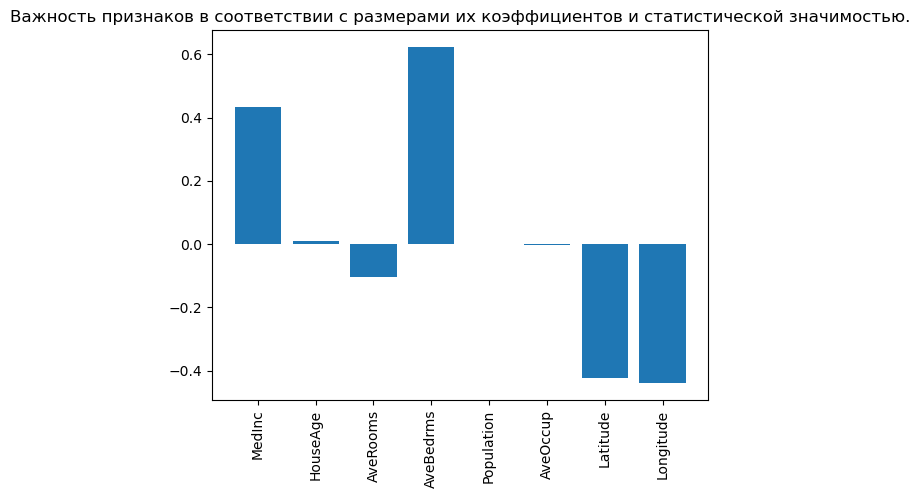

In [13]:

plt.bar(X.columns,model.coef_)
plt.title('Важность признаков в соответствии с размерами их коэффициентов и статистической значимостью.')
plt.xticks(rotation=90)
plt.show()